In [2]:
import os
import sys
# SRC_DIR environment variable should be the absolute path to the 'multicopy-STR-genotyping' directory
sys.path.append(os.environ["SRC_DIR"])

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from multicopy_STR_genotyping import file_io

sns.set_context("poster")
%matplotlib inline

In [5]:
df_repeats, df_hg002 = file_io.dfs_from_vcf(filename="../data/HG002/variants/HG002.GRCh38.2x250_with_mononuc.vcf", samples=["HG002.GRCh38.2x250"])

df_covered_repeats = pd.read_csv("../data/HG002/regions/hg38_ver13_0boe_mononucleotides_union.bed", sep="\t", names=["chr", "start", "end", "period", "unit"])
df_covered_repeats = df_covered_repeats.assign(
            str_id = np.array([f"{chrom}_{start + 1}" for chrom, start in zip(df_covered_repeats.chr, df_covered_repeats.start)])
)

df_covered_repeats = df_repeats[df_repeats["str_id"].isin(df_covered_repeats["str_id"])]

df_hg002 = df_hg002.dropna().merge(
    df_covered_repeats[["str_id", "chr", "start", "end", "period", "unit", "ref"]], on="str_id", how="inner"
).reset_index(drop=True)

df_hg002

,sample,str_id,copy_number,frequencies,genotype,chr,start,end,period,unit,ref
0,HG002.GRCh38.2x250,chr1_588068,2,{4: 22},"[4, 4]",chr1,588068,588079,3,CCT,4
1,HG002.GRCh38.2x250,chr1_589245,2,{6: 9},"[6, 6]",chr1,589245,589256,2,TC,6
2,HG002.GRCh38.2x250,chr1_590659,2,{3: 60},"[3, 3]",chr1,590659,590670,4,AAAT,3
3,HG002.GRCh38.2x250,chr1_590969,2,{4: 42},"[4, 4]",chr1,590969,590984,4,AAAC,4
4,HG002.GRCh38.2x250,chr1_591734,2,"{18: 2, 20: 9}","[20, 20]",chr1,591734,591751,1,A,18
...,...,...,...,...,...,...,...,...,...,...,...
1677856,HG002.GRCh38.2x250,chrY_26628607,1,{3: 31},[3],chrY,26628607,26628621,5,ATTTT,3
1677857,HG002.GRCh38.2x250,chrY_26632688,1,{6: 9},[6],chrY,26632688,26632705,3,TTC,6
1677858,HG002.GRCh38.2x250,chrY_26635262,1,{10: 33},[10],chrY,26635262,26635271,1,A,10
1677859,HG002.GRCh38.2x250,chrY_26637436,1,{4: 33},[4],chrY,26637436,26637447,3,TTA,4


In [6]:
df_hg002.assign(
    tmp = lambda x: [i in j for i, j in zip(x["ref"], x["genotype"])],
    depth = lambda x: [sum(i.values()) for i in x["frequencies"]],
    n_lengths = lambda x: [len(i) for i in x["frequencies"]]
).query("period >= 1 and period <= 1 and depth >= 50").sort_values("n_lengths", ascending=False).head(50)

,sample,str_id,copy_number,frequencies,genotype,chr,start,end,period,unit,ref,tmp,depth,n_lengths
573955,HG002.GRCh38.2x250,chr16_81086163,2,"{55: 41, 56: 4, 57: 5, 58: 3, 60: 3, 61: 3, 62...","[55, 55]",chr16,81086163,81086217,1,A,55,True,98,26
68611,HG002.GRCh38.2x250,chr1_109055098,2,"{41: 27, 42: 3, 43: 3, 44: 2, 46: 1, 48: 2, 49...","[41, 41]",chr1,109055098,109055138,1,T,41,True,56,21
878708,HG002.GRCh38.2x250,chr20_29880058,2,"{18: 10, 19: 3, 22: 3, 25: 4, 26: 7, 27: 7, 28...","[44, 44]",chr20,29880058,29880079,1,A,22,False,88,15
878747,HG002.GRCh38.2x250,chr20_30217780,2,"{7: 2, 10: 2, 14: 4, 15: 8, 16: 35, 17: 3, 19:...","[16, 16]",chr20,30217780,30217795,1,A,16,True,65,15
878971,HG002.GRCh38.2x250,chr20_30839018,2,"{9: 1, 10: 3, 11: 61, 12: 69, 13: 52, 14: 7, 1...","[11, 12]",chr20,30839018,30839035,1,T,18,False,237,10
878709,HG002.GRCh38.2x250,chr20_29882025,2,"{10: 1, 11: 25, 12: 1, 14: 30, 15: 16, 16: 13,...","[11, 14]",chr20,29882025,29882040,1,A,16,False,92,10
878970,HG002.GRCh38.2x250,chr20_30838655,2,"{6: 1, 8: 3, 10: 89, 11: 7, 12: 22, 13: 15, 22...","[10, 10]",chr20,30838655,30838666,1,A,12,False,141,9
1523137,HG002.GRCh38.2x250,chr9_28703,2,"{10: 40, 11: 42, 12: 11, 13: 4, 15: 10, 17: 6,...","[10, 11]",chr9,28703,28717,1,T,15,False,117,9
351032,HG002.GRCh38.2x250,chr12_102588724,2,"{4: 1, 10: 6, 11: 2, 13: 26, 15: 4, 20: 14, 24...","[13, 20]",chr12,102588724,102588733,1,A,10,False,55,8
248239,HG002.GRCh38.2x250,chr11_62213107,2,"{11: 7, 12: 13, 14: 1, 16: 2, 18: 12, 20: 3, 2...","[22, 22]",chr11,62213107,62213117,1,T,11,False,57,8


In [7]:
def expand_allele_lengths(lengths: dict):
    expanded = []
    for k, v in lengths.items():
        expanded.extend([k] * int(v))
    return np.array(sorted(expanded))

{8: 1, 9: 2, 11: 27, 12: 3, 13: 1, 14: 2, 15: 14, 17: 4}


<Axes: ylabel='Count'>

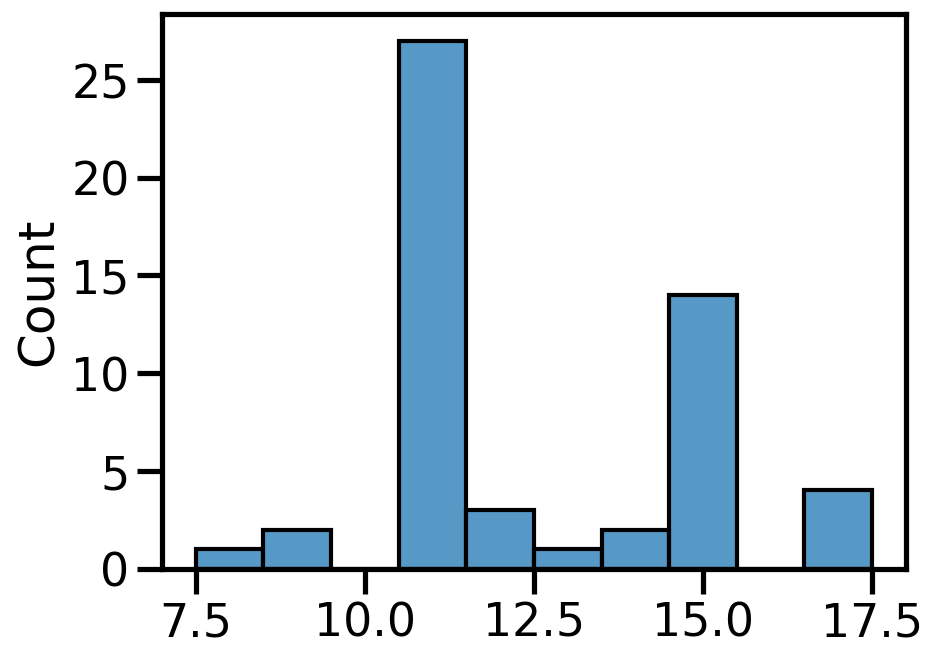

In [33]:
fig = plt.figure(dpi=150)

idx = 185225

print(df_hg002.loc[idx, "frequencies"])
freqs = expand_allele_lengths(df_hg002.loc[idx, "frequencies"])

sns.histplot(
    x = freqs,
    discrete=True
)


[Text(0.5, 0, 'Repeat length (# units)'), Text(0, 0.5, 'Count')]

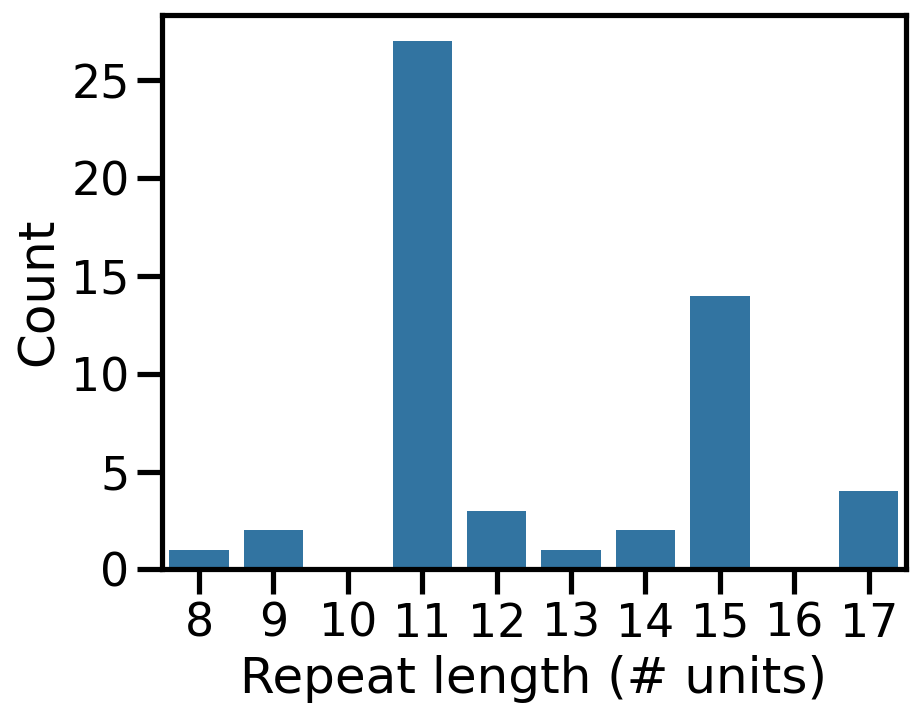

In [130]:
fig = plt.figure(dpi=150)

df = pd.DataFrame({
    "allele_length": df_hg002.loc[idx, "frequencies"].keys(), 
    "n": df_hg002.loc[idx, "frequencies"].values()
}).assign(discard = lambda x: x["n"] < 4)

x_order = pd.Categorical(range(8, 18), ordered=True)

ax = sns.barplot(
    df,
    x="allele_length",
    y="n",
    order = x_order
)

ax.set(
    xlabel = "Repeat length (# units)",
    ylabel = "Count",
)

[Text(0.5, 0, 'Repeat length (# units)'), Text(0, 0.5, 'Count')]

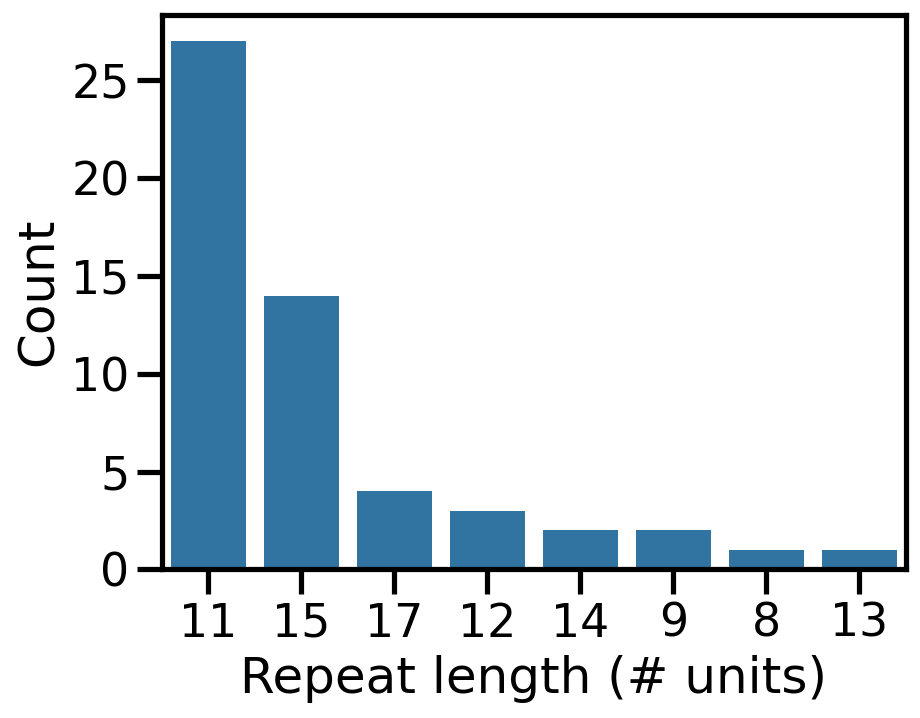

In [134]:
fig = plt.figure(dpi=150)
x_order = pd.Categorical(df["allele_length"], categories=df.sort_values("n", ascending=False)["allele_length"], ordered=True)

ax = sns.barplot(
    df,
    x=x_order,
    y="n",
)

ax.set(
    xlabel = "Repeat length (# units)",
    ylabel = "Count",
)

[Text(0.5, 0, 'Repeat length (# units)'), Text(0, 0.5, 'Count')]

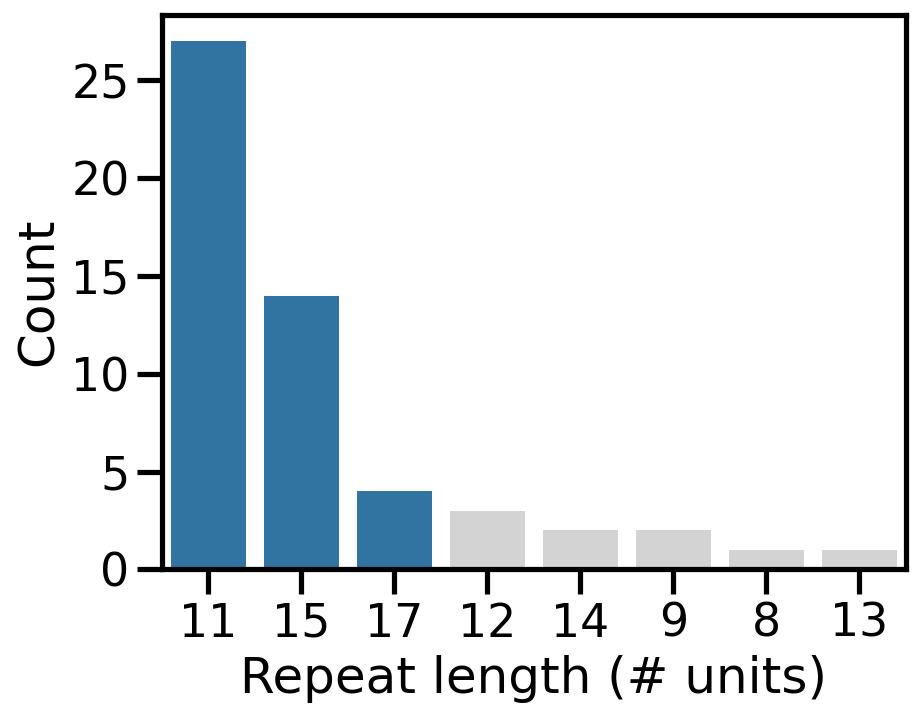

In [125]:
fig = plt.figure(dpi=150)
x_order = pd.Categorical(df["allele_length"], categories=df.sort_values("n", ascending=False)["allele_length"], ordered=True)

ax = sns.barplot(
    df,
    x=x_order,
    y="n",
    hue="discard",
    palette=[sns.color_palette()[0], "lightgrey"],
    legend=False
)

ax.set(
    xlabel = "Repeat length (# units)",
    ylabel = "Count",
)

In [120]:
n_reads = df["n"].sum()

df_filt = df.query("not discard").drop("discard", axis=1)

df_filt = df_filt.assign(
    expected1 = np.array([3, 0, 0]) * (n_reads / 3),
    expected2 = np.array([2, 1, 0]) * (n_reads / 3),
    expected3 = np.array([1, 1, 1]) * (n_reads / 3),
)

df_filt

,allele_length,n,expected1,expected2,expected3
2,11,27,54.0,36.0,18.0
6,15,14,0.0,18.0,18.0
7,17,4,0.0,0.0,18.0


In [121]:
df_filt = (
    df_filt        
        .rename(columns={"n": "observed"})
        .melt(id_vars=["allele_length"], var_name="distribution", value_name="n")
)

df_filt

,allele_length,distribution,n
0,11,observed,27.0
1,15,observed,14.0
2,17,observed,4.0
3,11,expected1,54.0
4,15,expected1,0.0
5,17,expected1,0.0
6,11,expected2,36.0
7,15,expected2,18.0
8,17,expected2,0.0
9,11,expected3,18.0


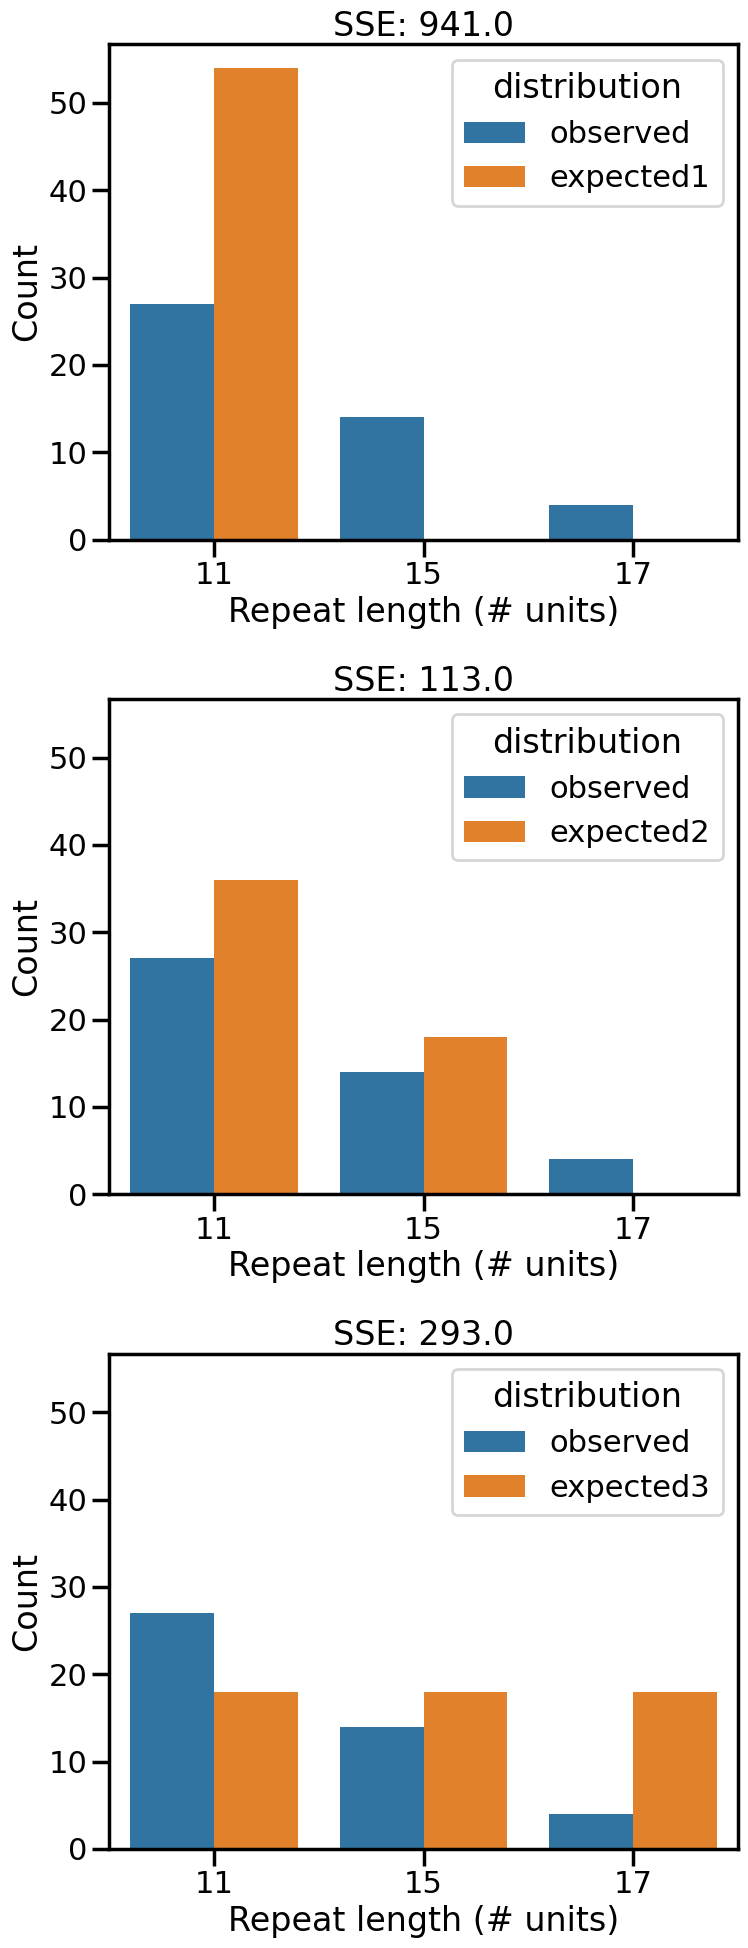

In [122]:
fig, axes = plt.subplots(3, 1, figsize=(8, 20), sharey=True)

for (group, data), ax in zip(df_filt.query("distribution != 'observed'").groupby("distribution"), axes.ravel()):
    data = pd.concat([
        df_filt.query("distribution == 'observed'"),
        data,        
    ])

    sse = np.sum((data.query("distribution == 'observed'")["n"].values - data.query("distribution != 'observed'")["n"].values)**2)
    
    ax = sns.barplot(
        data,
        x="allele_length",
        y="n",
        hue="distribution",
        ax=ax
    )
    ax.set(
        title=f"SSE: {sse}",
        xlabel = "Repeat length (# units)",
        ylabel = "Count",
    )

plt.tight_layout()

In [138]:
weak_compositions = pd.DataFrame(np.array([
    [3, 0, 0],
    [0, 3, 0],
    [0, 0, 3],
    [2, 1, 0],
    [0, 2, 1],
    [1, 0, 2],
    [2, 0, 1],
    [1, 2, 0],
    [0, 1, 2],
    [1, 1, 1],
]))

weak_compositions

,0,1,2
0,3,0,0
1,0,3,0
2,0,0,3
3,2,1,0
4,0,2,1
5,1,0,2
6,2,0,1
7,1,2,0
8,0,1,2
9,1,1,1


In [141]:
weak_compositions * 18

,0,1,2
0,54,0,0
1,0,54,0
2,0,0,54
3,36,18,0
4,0,36,18
5,18,0,36
6,36,0,18
7,18,36,0
8,0,18,36
9,18,18,18


In [158]:
observed = np.array([27, 14, 4])
(weak_compositions * 18 - observed)**2

,0,1,2
0,729,196,16
1,729,1600,16
2,729,196,2500
3,81,16,16
4,729,484,196
5,81,196,1024
6,81,196,196
7,81,484,16
8,729,16,1024
9,81,16,196


In [157]:
pd.DataFrame(np.sum((weak_compositions * 18 - observed)**2, axis=1))

,0
0,941
1,2345
2,3425
3,113
4,1409
5,1301
6,473
7,581
8,1769
9,293
